In [1]:
import uniplot as up
import pandas as pd
import numpy as np
import uvarprob as uvpr
import matplotlib.pyplot as plt
import solvutil as sut
import time

In [2]:
test_file = "tst1.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 1000
# The size of the legend in plots
legend_size = 2

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data

In [5]:
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
benchmark1,1./(7.26231 * (10. * x - 1.34364)^2 + 0.25275)...,0,1,0,0
benchmark2,x^3+2.*x+cos(10.*x),-3,3,0,0


In [6]:
points_db = {}
psl_lipint_points_list = []
psl_lip_points_list = []
psqe_lipint_points_list = []
psqe_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [8]:
for test in df.itertuples():
    print(test.Index)
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': [],
                             'psqe_lip_points_list': []}
    #     print(points_db)

    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x, lambda x : log_point(x, points_db[test.Index]['psl_lipint_points_list']))
    # print(sut.psl(prob, sym = False))
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x, lambda x : log_point(x, points_db[test.Index]['psl_lip_points_list']))
    # print(sut.psl(prob, sym = True))
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['psqe_lipint_points_list']))
    # T1 = time.perf_counter()
    # print(sut.psqe(prob, sym=False,epsilon=1e-2))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    # T1 = time.perf_counter()
    # print(sut.new_proc(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-2, global_lipschitz_interval=False,
    #                    estimator=2, reduction=1))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    # T1 = time.perf_counter()
    # print(sut.new_proc(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-2, global_lipschitz_interval=False,
    #                    estimator=2, reduction=0))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    # 
    T1 = time.perf_counter()
    print(sut.psqe(prob, sym=False,epsilon=1e-5,global_lipschitz_interval=True))
    T2 = time.perf_counter()
    print('time=', T2 - T1)
    # T1 = time.perf_counter()
    # print(sut.new_proc(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-2, global_lipschitz_interval=False,
    #                    estimator=2, reduction=1,adaptive=True))
    # T2 = time.perf_counter()
    
    # print('time=', T2 - T1)
    T1 = time.perf_counter()
    print(sut.new_proc(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-5, global_lipschitz_interval=True,
                       estimator=2, reduction=2,adaptive=False))
    T2 = time.perf_counter()
    print('time=', T2 - T1)
    
    T1 = time.perf_counter()
    print(sut.new_proc(prob=prob, symm=False, max_steps=max_steps, epsilon=1e-5, global_lipschitz_interval=True,
                       estimator=2, reduction=1,adaptive=False))
    T2 = time.perf_counter()
    print('time=', T2 - T1)
    
    T1 = time.perf_counter()
    print(sut.)
    T2 = time.perf_counter()
    print('time=', T2 - T1)
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x, lambda x : log_point(x, points_db[test.Index]['psqe_lip_points_list']))
    # print(sut.psqe(prob, sym = True))


benchmark1
TestResult(nsteps=18426, record_value=-6.460074565402859)
time= 0.44146512501174584
3697664544.0541525 0
TestResult(nsteps=19450, record_value=-6.4600745654422385)
time= 0.2959102500171866
3697664544.0541525 0
TestResult(nsteps=19455, record_value=-6.460074565451496)
time= 0.26034179198904894
benchmark2
TestResult(nsteps=4, record_value=-32.84574855011242)
time= 0.0001350840029772371
236.0 0
TestResult(nsteps=4, record_value=-32.84574855011242)
time= 0.00010725000174716115
236.0 0
TestResult(nsteps=4, record_value=-32.84574855011242)
time= 7.479198393411934e-05


In [10]:
def vis_trials(points_list, num_series, base_level):
    poix = np.array(list(set(points_list[::skip])))
    poiy = np.full(len(poix), base_level + num_series * -0.5)
    up.plot_points(poix, poiy, num_series)

Pandas(Index='benchmark2', objective='x^3+2.*x+cos(10.*x)', a=-3, b=3, min_f=0, min_x=0)


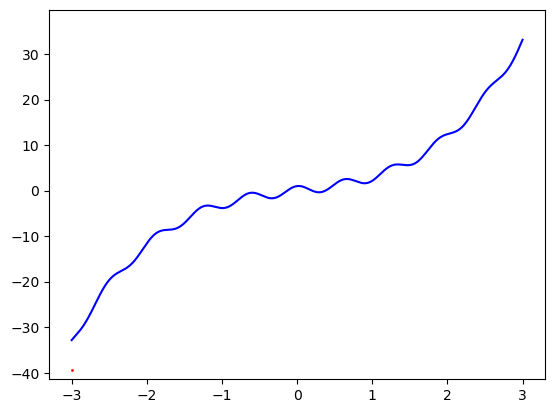

Pandas(Index='benchmark1', objective='1./(7.26231 * (10. * x - 1.34364)^2 + 0.25275) + 1./(3.96356 * (10. * x - 2.55069)^2 + 0.1899) + 1./(6.64323 * (10. * x - 6.51593)^2 + 0.11877) + 1./(7.13707 * (10. * x - 0.28347)^2 + 0.18655) + 1./(1.00844 * (10. * x - 7.6228)^2 + 0.18908) + 1./(2.12438 * (10. * x - 7.2154)^2 + 0.28905) + 1./(1.1261 * (10. * x - 9.01427)^2 + 0.10509) + 1./(8.2846 * (10. * x - 5.41412)^2 + 0.17624) + 1./(3.4012 * (10. * x - 2.16599)^2 + 0.10581) + 1./(3.51853 * (10. * x - 2.21692)^2 + 0.19916)-7', a=0, b=1, min_f=0, min_x=0)


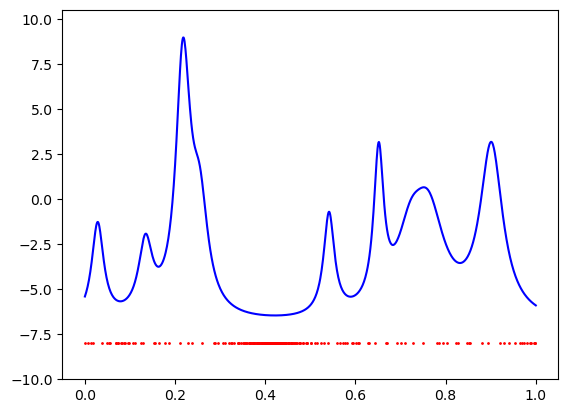

In [29]:
for test in df.itertuples():
    print(test)
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    up.plot_problem(prob, {'function': 'b-'}, legend=legend_size)
    vis_trials(points_db[test.Index]['psqe_lipint_points_list'], 0, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['psqe_lip_points_list'], 1, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['psl_lipint_points_list'], 2, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['psl_lip_points_list'], 3, plt.ylim()[0] + legend_size)
    #     print("ylim = ", plt.ylim()[0])
    plt.show()
